# Model 2: Random Forest

* RandomForst and combinations of feature selection, nested y classes
* BoostedClassifer 
* timeseriessplit for train/test split and cross validation, given sequenced data

In [43]:
from dotenv import load_dotenv
import sys
import warnings

from __init__ import get_base_path
import data.load_data as load_data
import models.model_utils as models

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import auc, accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay, classification_report, \
    roc_curve, RocCurveDisplay

import numpy as np
import os
import pandas as pd
from pandas.api.types import is_numeric_dtype
from matplotlib import pyplot as plt
import seaborn as sns

load_dotenv()
warnings.filterwarnings('ignore')

In [44]:
random_state = int(os.getenv('RANDOM_SEED'))

# Load Data

In [45]:
csv_file = load_data.combined_csv

df = load_data.load_from_csv(csv_file)

pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.max_rows', df.shape[0])

(78288, 232)


# Training Loop

* iterate X, y feature combinations
* train, test, split - time series split given signal sequence
* scale and one-hot encode
* train
* evaluate

In [46]:
features = models.FeatureStore(df)

X_features = [['R1_Phase_A_power_wave'], features.R1_waves, features.R1_R2_waves] # features.all_power_waves
y_features = [features.y_binary, features.y_tertiary, features.y_broad_class, features.y_full_class]

In [ ]:
# TRAINING WITH TIME SERIES CROSS VALIDATION
timecv = TimeSeriesSplit(n_splits=5)
clf = RandomForestClassifier(random_state=random_state)

exp = models.SK_Classification_Experiment(df, X_features, y_features, estimators=[clf])
exp.run_experiments()

# Evaluation - Classification Reports

### Binary Class Predictions

In [ ]:
binary_predictions = [i for i in exp.experiment_scores if i['y_features'] == features.y_binary]

for i in binary_predictions:
    print(i['X_features'])
    print('Training Scores')
    print(i['training_classification_report'])
    print('Test Scores')
    print(i['test_classification_report'])

### Tertiary Class Predictions

In [ ]:
tertiary_predictions = [i for i in exp.experiment_scores if i['y_features'] == features.y_tertiary]

for i in tertiary_predictions:
    print(i['X_features'])
    print('Training Scores')
    print(i['training_classification_report'])
    print('Test Scores')
    print(i['test_classification_report'])

### Broad Class Predictions

In [ ]:
broad_class_predictions = [i for i in exp.experiment_scores if i['y_features'] == features.y_broad_class]

for i in broad_class_predictions:
    print(i['X_features'])
    print('Training Scores')
    print(i['training_classification_report'])
    print('Test Scores')
    print(i['test_classification_report'])

### Full Class Predictions

In [ ]:
full_class_predictions = [i for i in exp.experiment_scores if i['y_features'] == features.y_full_class]

for i in full_class_predictions:
    print(i['X_features'])
    print('Training Scores')
    print(i['training_classification_report'])
    print('Test Scores')
    print(i['test_classification_report'])

# Evaluation - Get Feature Importance

Compare coefficients across the top and worst performing models.

* The binary/tertiary models were 'best performing' model by metric. The full class model with R1 & R2 features was among the worst performing experiments by metric. Both models assigned constant/equal importance to each feature... not helpful.

In [ ]:
def plot_importance(X_cols, clf):
    importance = [(i, j) for i, j in zip(X_cols, np.round(clf.feature_importances_,2))]

    importance = pd.DataFrame(importance, columns=['feature','importance'], index=range(len(importance)))
    importance.sort_values(by='importance',ascending=False,inplace=True)

    # largest and smallest coeff
    top_importance = importance.head(8)
    bottom_importance = importance.tail(8)

    fig, ax = plt.subplots(2,1, figsize=(12.5,4))
   
    # plot top coeff
    g0 = ax[0].barh(top_importance['feature'],top_importance['importance'])
    ax[0].set_title('Top Features (Importance)')
    ax[0].bar_label(g0, fmt=lambda x: f'{x:.2f}')

    # plot bottom coeff
    g1 = ax[1].barh(bottom_importance['feature'],bottom_importance['importance'])
    ax[1].set_title('Bottom Features (Importance)')
    ax[1].bar_label(g1, fmt=lambda x: f'{x:.2f}')

    plt.tight_layout()
    plt.show()

    return importance

In [ ]:
# # binary example - 4th index is R1 wave features
# clf = exp.experiment_scores[4]['estimator']
# X_features = exp.experiment_scores[4]['X_features']

# print(X_features)
# print(exp.experiment_scores[4]['y_features'])

# plot_importance(X_features, clf)

In [ ]:
# # full class model - 11th index is R1R2 wave features
# clf = exp.experiment_scores[11]['estimator']
# X_features = exp.experiment_scores[11]['X_features']

# print(X_features)
# print(exp.experiment_scores[11]['y_features'])

# plot_importance(X_features, clf)

# Evaluation - Confusion Matrix

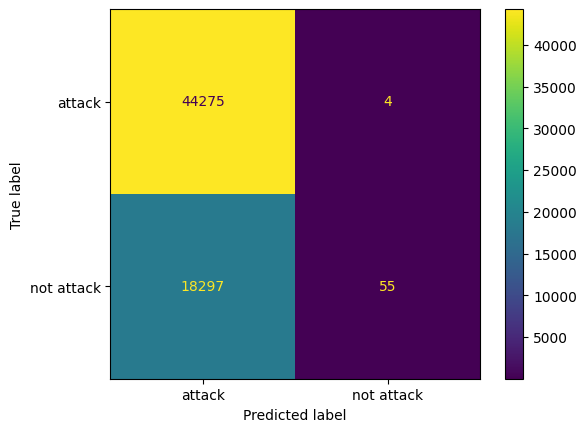

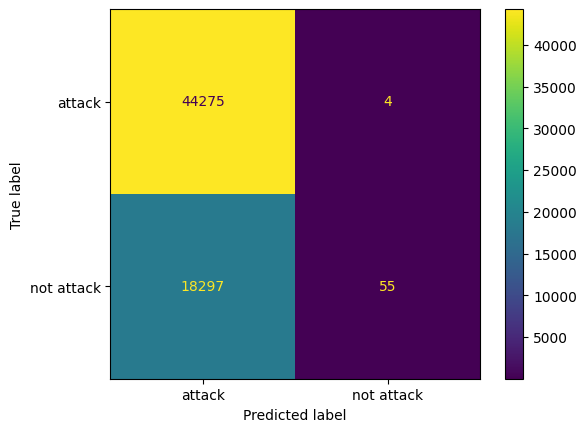

In [ ]:
# binary example - 4th index is R1 wave features
y_true = exp.experiment_scores[4]['train_true']
y_pred = exp.experiment_scores[4]['train_pred']
labels = exp.experiment_scores[4]['y_classes']

disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels)
disp.plot()
plt.show()

# Evaluation - ROC

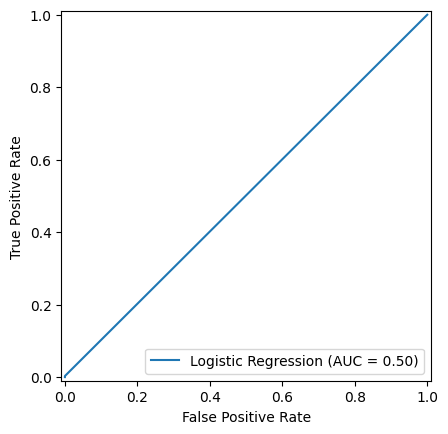

In [ ]:
# binary example again
y_true = exp.experiment_scores[4]['train_true']
y_pred = exp.experiment_scores[4]['train_pred']
labels = exp.experiment_scores[4]['y_classes']

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Logistic Regression')
curve.plot()
plt.show()

# GradientBoostingClassifier


In [ ]:
# # TRAINING WITH TIME SERIES CROSS VALIDATION
# timecv = TimeSeriesSplit(n_splits=5)
# clf = GradientBoostingClassifier(random_state=random_state)

# exp = models.SK_Classification_Experiment(df, X_features, y_features, estimators=[clf])
# exp.run_experiments()

# Evaluation - Classification Reports

### Binary Class Predictions

In [ ]:
# binary_predictions = [i for i in exp.experiment_scores if i['y_features'] == features.y_binary]

# for i in binary_predictions:
#     print(i['X_features'])
#     print('Training Scores')
#     print(i['training_classification_report'])
#     print('Test Scores')
#     print(i['test_classification_report'])

### Tertiary Class Predictions

In [ ]:
# tertiary_predictions = [i for i in exp.experiment_scores if i['y_features'] == features.y_tertiary]

# for i in tertiary_predictions:
#     print(i['X_features'])
#     print('Training Scores')
#     print(i['training_classification_report'])
#     print('Test Scores')
#     print(i['test_classification_report'])

### Broad Class Predictions

In [ ]:
# broad_class_predictions = [i for i in exp.experiment_scores if i['y_features'] == features.y_broad_class]

# for i in broad_class_predictions:
#     print(i['X_features'])
#     print('Training Scores')
#     print(i['training_classification_report'])
#     print('Test Scores')
#     print(i['test_classification_report'])

### Full Class Predictions

In [ ]:
# full_class_predictions = [i for i in exp.experiment_scores if i['y_features'] == features.y_full_class]

# for i in full_class_predictions:
#     print(i['X_features'])
#     print('Training Scores')
#     print(i['training_classification_report'])
#     print('Test Scores')
#     print(i['test_classification_report'])

Boosted Classifier had moderate increase in accuracy and decrease in F1 - looking a lot more like the LogisticRegression model.

In [ ]:
# for i in exp.experiment_scores:
#     print(i['X_features'])
#     print(i['y_features'])
#     print(i['test_f1'])
#     print(i['test_accuracy'])